# Multirotor trajectory optimization with openmdao and FMU

In [1]:
import os.path as pth
import numpy as np
import matplotlib.pyplot as plt
import openmdao.api as om

Unable to import mpi4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.


In [2]:
# Loading the different FMUs

from pyfmi import load_fmu

ressources_folder = "../ressources"
speed_model_file_name = "DroneFMU.DroneOptim_Speed.fmu"
torque_model_file_name = "DroneFMU.DroneOptim_Torque.fmu"

speed_file_path = pth.join(ressources_folder, speed_model_file_name)
torque_file_path = pth.join(ressources_folder, torque_model_file_name)

#Load the FMU
speed_model = load_fmu(speed_file_path) # Model
torque_model = load_fmu(torque_file_path) # Model

## Running the model

In [3]:
from trajectory import Model, plot_trajectory

num_points = 100
num_simu_points = 500
final_time = 5.
use_torque = True
model = torque_model

# Initial torque
torque = np.linspace(0.06, 0.06, num=num_points)

prob = om.Problem()
prob.model = Model(
                num_points=num_points,
                num_simu_points=num_simu_points,
                final_time=final_time,
                use_torque=use_torque,
                model=model,
)

prob.setup(check=True)

prob["torque"] = torque

prob.run_model()

INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.024123999999998702 seconds.


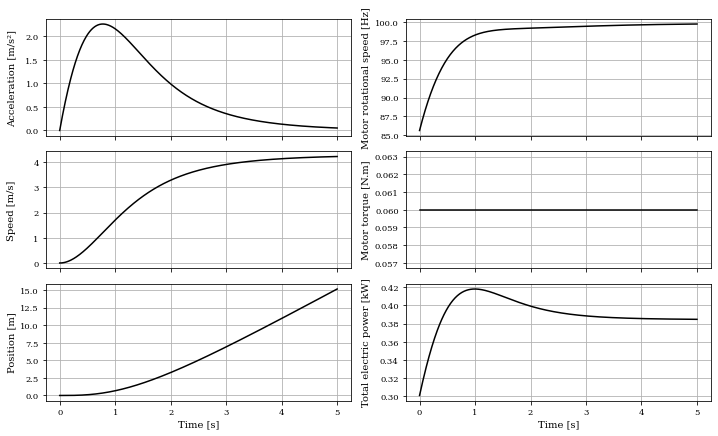

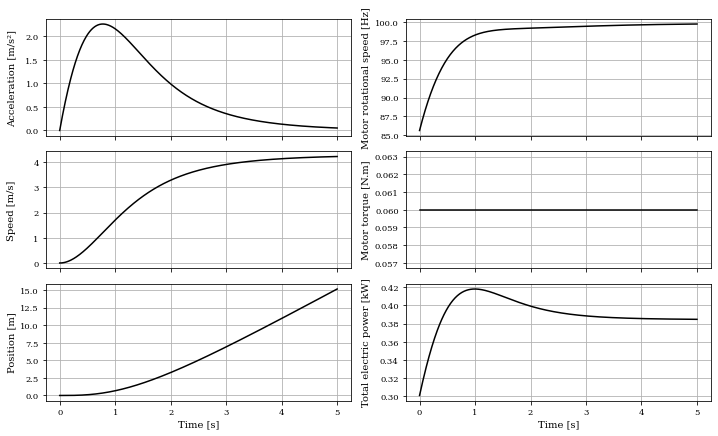

In [4]:
plot_trajectory(prob.model.trajectory.res)

## Run an optimization

In [5]:
from trajectory import Model, plot_trajectory
from time import time
num_points = 16
num_simu_points = 500
final_time = 5.
use_torque = True
model = torque_model

# Hover torque
T_hov = 0.04214243*1.2

# Initial torque
torque = np.linspace(T_hov, T_hov, num=num_points)

prob = om.Problem()

prob.model = Model(
                num_points=num_points,
                num_simu_points=num_simu_points,
                final_time=final_time,
                use_torque=use_torque,
                model=model,
)

prob.driver = om.ScipyOptimizeDriver()
prob.driver.options['optimizer'] = 'SLSQP'
prob.driver.options['tol'] = 1e-8
prob.driver.options['maxiter'] = 200
prob.model.add_design_var('torque', lower=T_hov*0.1, upper=T_hov*2.)
prob.model.add_design_var('final_time', lower=2., upper=10.)
# prob.model.add_constraint('acc_capacity', lower=0.0)
prob.model.add_constraint('final_speed', lower=0., upper=0.0)
prob.model.add_constraint('final_position', lower=10., scaler=1e-1)
# prob.model.add_objective('total_energy', ref0=100., ref=20000.)
prob.model.add_objective('total_energy', scaler=1e-3)

prob.setup(check=True)

prob["torque"] = torque
prob["final_time"] = final_time
t0 = time()
prob.run_driver()
tf = time()
print("Total energy : ", prob["total_energy"], tf-t0)

INFO: checking out_of_order
INFO: checking system
INFO: checking solvers
INFO: checking dup_inputs
INFO: checking missing_recorders
INFO: checking comp_has_no_outputs
INFO: checking auto_ivc_warnings
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.02089430000000192 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.026096100000000177 seconds.
Simulation interval    : 0.0 - 5.000001 seconds.
Elapsed simulation time: 0.022922300000001172 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.020948699999998155 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.020764800000002026 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.021012200000001258 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.02137949999999833 seconds.
Simulation interval    : 0.0 - 5.0 seconds.
Elapsed simulation time: 0.02326359999999994 seconds.
Simula

Elapsed simulation time: 0.02118589999999898 seconds.
Simulation interval    : 0.0 - 2.952564819509852 seconds.
Elapsed simulation time: 0.021561099999999556 seconds.
Simulation interval    : 0.0 - 2.9525658195098528 seconds.
Elapsed simulation time: 0.01913550000000086 seconds.
Simulation interval    : 0.0 - 2.952564819509852 seconds.
Elapsed simulation time: 0.021138900000000405 seconds.
Simulation interval    : 0.0 - 2.952564819509852 seconds.
Elapsed simulation time: 0.020425199999998256 seconds.
Simulation interval    : 0.0 - 2.952564819509852 seconds.
Elapsed simulation time: 0.023595000000000255 seconds.
Simulation interval    : 0.0 - 2.952564819509852 seconds.
Elapsed simulation time: 0.021534899999998913 seconds.
Simulation interval    : 0.0 - 2.952564819509852 seconds.
Elapsed simulation time: 0.019021500000000913 seconds.
Simulation interval    : 0.0 - 2.952564819509852 seconds.
Elapsed simulation time: 0.02106149999999829 seconds.
Simulation interval    : 0.0 - 2.9525648195

Simulation interval    : 0.0 - 2.831400447561962 seconds.
Elapsed simulation time: 0.021125000000001393 seconds.
Simulation interval    : 0.0 - 2.8313994475619624 seconds.
Elapsed simulation time: 0.022806599999999122 seconds.
Simulation interval    : 0.0 - 2.8313994475619624 seconds.
Elapsed simulation time: 0.02155129999999872 seconds.
Simulation interval    : 0.0 - 2.8313994475619624 seconds.
Elapsed simulation time: 0.023013200000001177 seconds.
Simulation interval    : 0.0 - 2.8313994475619624 seconds.
Elapsed simulation time: 0.019670399999998978 seconds.
Simulation interval    : 0.0 - 2.8313994475619624 seconds.
Elapsed simulation time: 0.02163709999999952 seconds.
Simulation interval    : 0.0 - 2.8313994475619624 seconds.
Elapsed simulation time: 0.021139800000000264 seconds.
Simulation interval    : 0.0 - 2.8313994475619624 seconds.
Elapsed simulation time: 0.01832430000000329 seconds.
Simulation interval    : 0.0 - 2.8313994475619624 seconds.
Elapsed simulation time: 0.021664

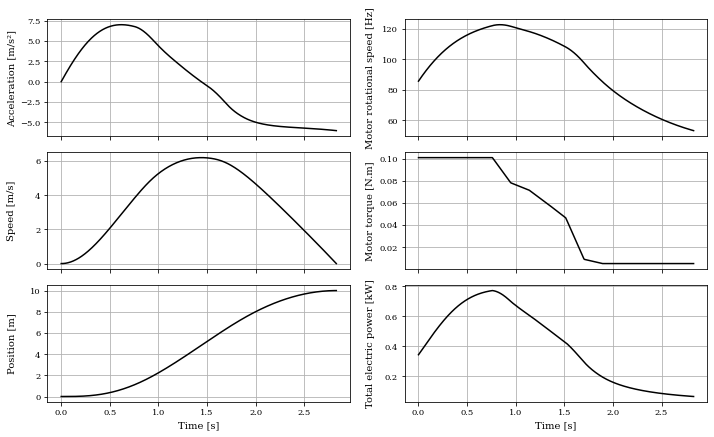

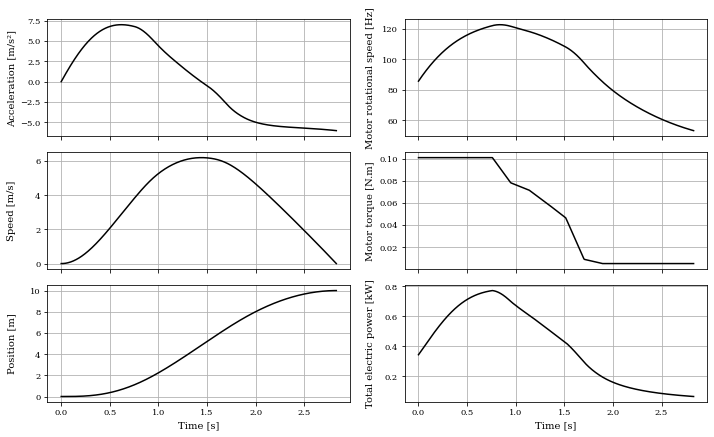

In [8]:
plot_trajectory(prob.model.trajectory.res)